In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import plotnine as p9
import statsmodels.api as sm

import statsmodels.formula.api as smf
# Tworzenie regresji przy użyciu zmiennej "btystdave" w celu przewidzenia oceny kursu, zmienna "courseevaluation"

In [3]:
data = pd.read_csv(r'C:\Users\Lenovo\Desktop\Studia\Semestr VII\Analiza i Bazy\Analiza-i-Bazy-Danych\Lab6\beauty.csv')

In [4]:
data.head()

,tenured,profnumber,minority,age,beautyf2upper,beautyflowerdiv,beautyfupperdiv,beautym2upper,beautymlowerdiv,beautymupperdiv,...,nonenglish,onecredit,percentevaluating,profevaluation,students,tenuretrack,blkandwhite,btystdvariance,btystdavepos,btystdaveneg
0,0,1,1,36,6,5,7,6,2,4,...,0,0,55.81395,4.7,43,1,0,2.129806,0.201567,0.000000
1,1,2,0,59,2,4,4,3,2,3,...,0,0,85.00000,4.6,20,1,0,1.386081,0.000000,-0.826081
2,1,3,0,51,5,5,2,3,2,3,...,0,0,100.00000,4.1,55,1,0,2.537435,0.000000,-0.660333
3,1,4,0,40,4,2,5,2,3,3,...,0,0,86.95652,4.5,46,1,0,1.760577,0.000000,-0.766312
4,0,5,0,31,9,7,9,6,7,6,...,0,0,87.50000,4.8,48,1,0,1.693100,1.421450,0.000000


In [13]:
X = data['btystdave'].values.reshape(-1,1)

In [14]:
Y = data['courseevaluation'].values.reshape(-1,1)

In [15]:
from sklearn.model_selection import train_test_split 

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [17]:
regressor = LinearRegression()  

In [18]:
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
y_pred = regressor.predict(X_test)

In [20]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,4.5,4.063292
1,3.3,3.881328
2,4.3,3.894234
3,4.0,3.972826
4,3.4,3.896018
...,...,...
88,4.4,4.025482
89,3.7,3.947504
90,2.9,4.058445
91,3.9,4.057259


In [23]:
import matplotlib.pyplot as plt 

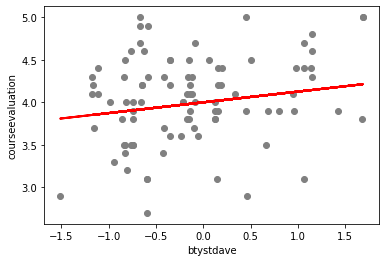

In [26]:
# Model
plt.xlabel('btystdave')
plt.ylabel('courseevaluation')
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [28]:
# Tworzenie modelu residuów

df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,4.5,4.063292
1,3.3,3.881328
2,4.3,3.894234
3,4.0,3.972826
4,3.4,3.896018
...,...,...
88,4.4,4.025482
89,3.7,3.947504
90,2.9,4.058445
91,3.9,4.057259


In [29]:
df['residuals'] = abs(df['Actual']-df['Predicted'])

In [31]:
df['x2'] = data['btystdave']

In [32]:
df.head()

,Actual,Predicted,residuals,x2
0,4.5,4.063292,0.436708,0.201567
1,3.3,3.881328,0.581328,-0.826081
2,4.3,3.894234,0.405766,-0.660333
3,4.0,3.972826,0.027174,-0.766312
4,3.4,3.896018,0.496018,1.421445


In [33]:
RESI = df['x2'].values.reshape(-1,1)

In [34]:
Y_RESI = df['residuals'].values.reshape(-1,1)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(RESI, Y_RESI, test_size=0.2, random_state=0)

In [36]:
regressor = LinearRegression()  

In [37]:
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
y_pred = regressor.predict(X_test)

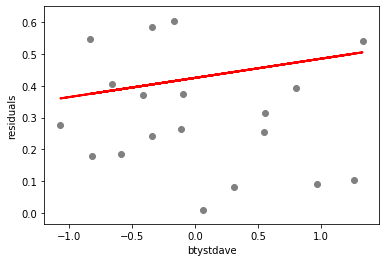

In [41]:
# Model residuów

plt.xlabel('btystdave')
plt.ylabel('residuals')
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [45]:
import seaborn as sns

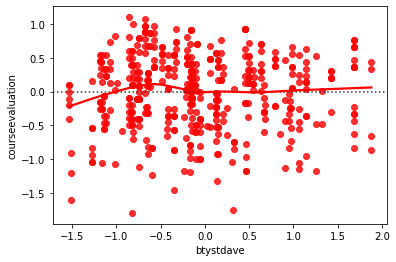

In [47]:
sns.residplot(data['btystdave'], data['courseevaluation'], lowess=True, color="r")
plt.show()

In [64]:
# Tworzenie modelu z interakcjami
wyniki = smf.ols('courseevaluation ~ btystdaveneg + profevaluation', data=data.head(100)).fit()

In [65]:
wyniki_ = wyniki.params

In [66]:
wyniki.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       courseevaluation   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     378.2
Date:                Thu, 12 Dec 2019   Prob (F-statistic):           1.58e-46
Time:                        20:48:20   Log-Likelihood:                 27.016
No. Observations:                 100   AIC:                            -48.03
Df Residuals:                      97   BIC:                            -40.22
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.1699      0.139      1.221      0.225      -0.106       0.446
btystdaveneg       0.0082      0.044      0.185      0.854      -0.080       0.096
profevaluation     0.9148      0.033     27.421      0.000       0.849       0.981
==============================================================================
Omnibus:                       10.939   Durbin-Watson:                   1.714
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               14.117
Skew:                          -0.554   Prob(JB):                     0.000860
Kurtosis:                       4.469   Cond. No.                         32.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
fig=(p9.ggplot(p9.aes(x='profevaluation',y='courseevaluation'),data=data.head(100))
      +p9.geom_jitter(width=0.2)
      +p9.geom_abline(p9.aes(intercept=wyn['Intercept'],slope=wyn['profevaluation'])))

C:\Users\Lenovo\Anaconda3\lib\site-packages\plotnine\scales\scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
C:\Users\Lenovo\Anaconda3\lib\site-packages\plotnine\layer.py:517: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return not cbook.iterable(value) and (cbook.is_numlike(value) or
C:\Users\Lenovo\Anaconda3\lib\site-packages\plotnine\layer.py:517: MatplotlibDeprecationWarning: 
The is_numlike function was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use isinstance(..., numbers.Number) instead.
  return not cbook.iterable(value) and (cbook.is_numlike(value) or
C:\Users\Lenovo\Anaconda3\lib\site-packages\plotnine\utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 a

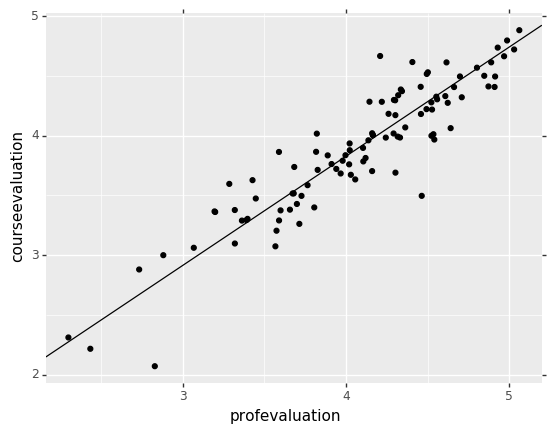

<ggplot: (177446220166)>

In [68]:
fig